In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from mle_toolbox import load_result_logs

# PDE Integration Example
### Load in meta-log and hyper-log files

- The meta-log stores all detailed training logs (e.g. training curves, etc.)
- The hyper-log stores all aggregated training results

In [2]:
# Load log and get overview of different logged runs
experiment_dir = "../examples/experiments/pde/"
experiment_dir = "../tests/unit/fixtures/"
meta_log, hyper_log = load_result_logs(experiment_dir)
meta_log.eval_ids

['b_1_eval_0', 'b_1_eval_1', 'b_2_eval_0', 'b_2_eval_1']

In [3]:
# And here are the different items stored in the log
print("Outer level:", list(meta_log.b_1_eval_0.keys()))
print("Meta level:", list(meta_log.b_1_eval_0.meta.keys()))
print("Time level:", list(meta_log.b_1_eval_0.time.keys()))
print("Stats level:", list(meta_log.b_1_eval_0.stats.keys()))

Outer level: ['meta', 'stats', 'time']
Meta level: ['config_dict', 'config_fname', 'eval_id', 'experiment_dir', 'fig_storage_paths', 'log_paths', 'model_type', 'seeds']
Time level: ['step_counter', 'time', 'time_elapsed']
Stats level: ['integral', 'noise']


In [4]:
# The meta data stores all the data relevant for recovering parts of the experiment
meta_log.b_1_eval_0.meta

DotMap(config_dict={'train_config': {'x_0': 1.0, 'noise_mean': 0.0, 'noise_std': 0.1, 't_max': 100, 'dt': 0.1}, 'log_config': {'time_to_track': ['step_counter'], 'what_to_track': ['integral', 'noise'], 'verbose': True, 'print_every_k_updates': 5, 'log_every_j_steps': 100, 'overwrite': 1}}, config_fname='experiments/pde/grid/21-09-13_b_1_eval_0/21-09-13_b_1_eval_0.json', eval_id='_b_1_eval_0', experiment_dir='experiments/pde/grid/21-09-13_b_1_eval_0/', fig_storage_paths=['experiments/pde/grid/21-09-13_b_1_eval_0/figures/fig_1_seed_2.png', 'experiments/pde/grid/21-09-13_b_1_eval_0/figures/fig_1_seed_4.png'], log_paths=['experiments/pde/grid/21-09-13_b_1_eval_0/logs/log_seed_2.hdf5', 'experiments/pde/grid/21-09-13_b_1_eval_0/logs/log_seed_4.hdf5'], model_type='no-model-type', seeds=[2, 4])

### Visualize a Time Series/Learning Curve ("Manual" + MLE-Toolbox)

In [5]:
meta_log.b_1_eval_0.time.step_counter

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.], dtype=float32)

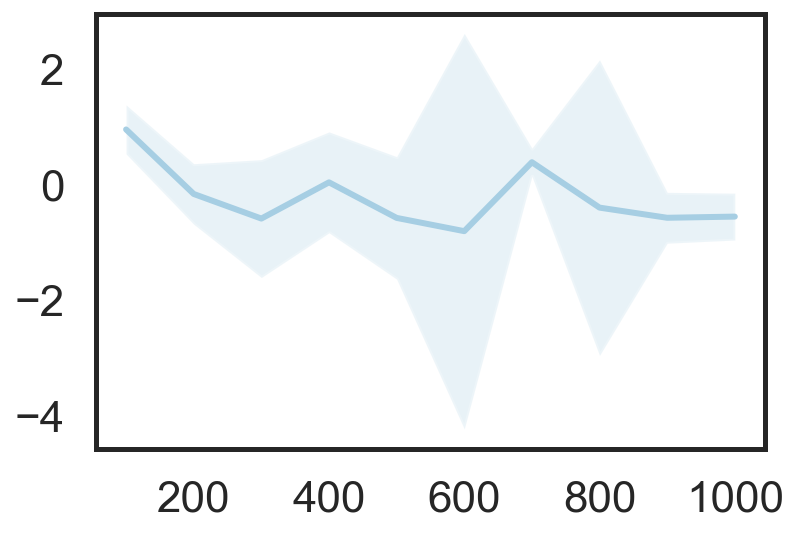

In [6]:
# If you want to get access to a specific variable just index it!

import matplotlib.pyplot as plt
plt.plot(meta_log.b_1_eval_0.time.step_counter,
         meta_log.b_1_eval_0.stats.noise.mean)
plt.fill_between(meta_log.b_1_eval_0.time.step_counter,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 - 2 * meta_log.b_1_eval_0.stats.noise.std,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 + 2 * meta_log.b_1_eval_0.stats.noise.std,
                 alpha=0.25)

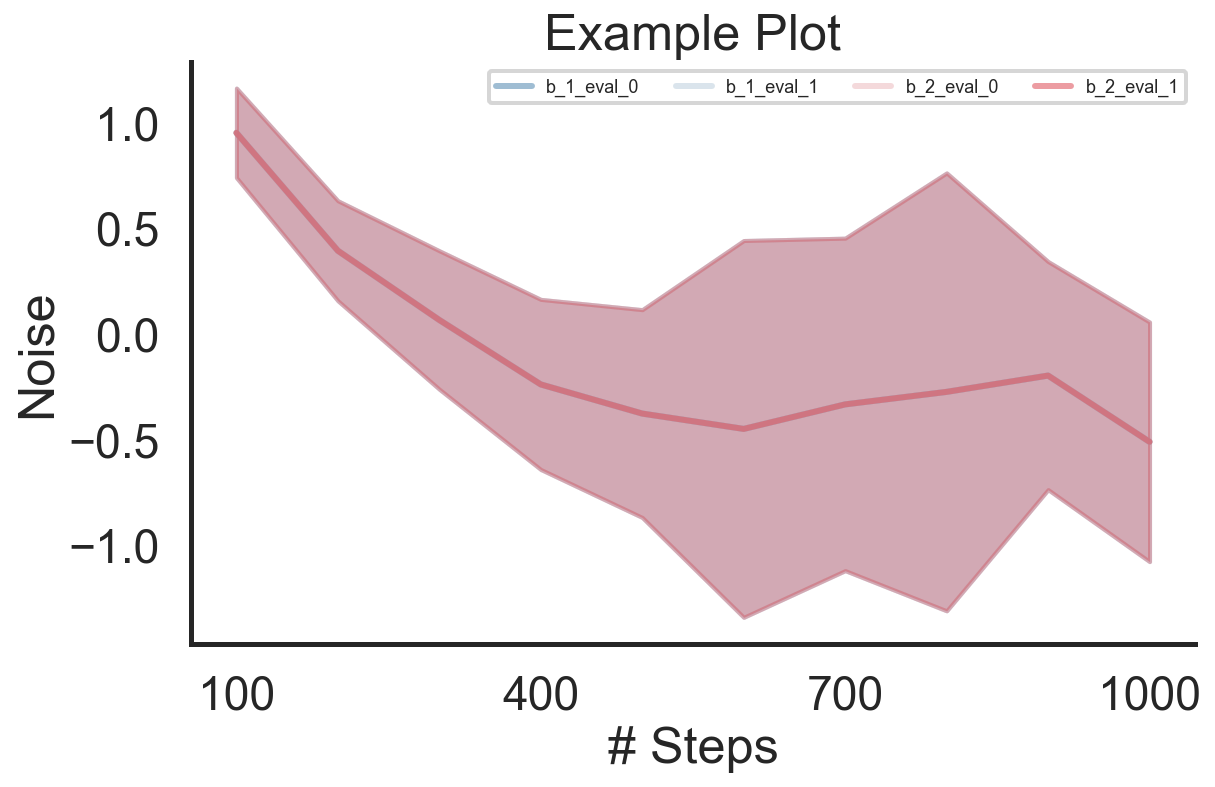

In [7]:
from mle_toolbox.visualize import visualize_1D_lcurves

fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="step_counter",
                               target_to_plot="noise",
                               smooth_window=3,
                               plot_title= "Example Plot",
                               xy_labels = [r"# Steps",
                                            r"Noise"],
                               base_label=r"{}",
                               curve_labels=[],
                               every_nth_tick= 3,
                               plot_std_bar= True)
ax.legend(ncol=5, fontsize=9)

### Plot 2D Heatmap of tracked variable

In [8]:
meta_log.b_1_eval_1.stats.integral

DotMap(mean=masked_array(data=[9.01657772064209, 8.212488651275635,
                   7.4474663734436035, 6.902414321899414,
                   6.185892105102539, 5.587714910507202,
                   5.040204048156738, 4.501845121383667,
                   4.111863374710083, 3.6420599222183228],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), std=masked_array(data=[0.06490230560302734, 0.010994434356689453,
                   0.17933320999145508, 0.08734273910522461,
                   0.17107057571411133, 0.32532525062561035,
                   0.287872314453125, 0.32450318336486816,
                   0.28604769706726074, 0.23443090915679932],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), p50=array([9.01657772, 8.21248865, 7.44746637, 6.90241432, 6.18589211,
       5.58771491, 5.04020405, 4.50184512, 4.111863

In [9]:
meta_log.b_1_eval_1.stats.integral

DotMap(mean=masked_array(data=[9.01657772064209, 8.212488651275635,
                   7.4474663734436035, 6.902414321899414,
                   6.185892105102539, 5.587714910507202,
                   5.040204048156738, 4.501845121383667,
                   4.111863374710083, 3.6420599222183228],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), std=masked_array(data=[0.06490230560302734, 0.010994434356689453,
                   0.17933320999145508, 0.08734273910522461,
                   0.17107057571411133, 0.32532525062561035,
                   0.287872314453125, 0.32450318336486816,
                   0.28604769706726074, 0.23443090915679932],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20), p50=array([9.01657772, 8.21248865, 7.44746637, 6.90241432, 6.18589211,
       5.58771491, 5.04020405, 4.50184512, 4.111863

In [10]:
hyper_log#.log_paths.iloc[0]

   noise_mean   x_0  time_elapsed      run_id  integral     noise                                          log_paths                             experiment_dir                                       config_fname   seeds     model_type                                  fig_storage_paths                                          log_fname
0        0.00   1.0      4.232690  b_1_eval_0  0.332801 -0.556098  [experiments/pde/grid/21-09-13_b_1_eval_0/logs...  experiments/pde/grid/21-09-13_b_1_eval_0/  experiments/pde/grid/21-09-13_b_1_eval_0/21-09...  [2, 4]  no-model-type  [experiments/pde/grid/21-09-13_b_1_eval_0/figu...  experiments/pde/grid/21-09-13_b_1_eval_0/logs/...
1        0.00  10.0      4.232690  b_1_eval_1  3.642060 -0.556098  [experiments/pde/grid/21-09-13_b_1_eval_1/logs...  experiments/pde/grid/21-09-13_b_1_eval_1/  experiments/pde/grid/21-09-13_b_1_eval_1/21-09...  [2, 4]  no-model-type  [experiments/pde/grid/21-09-13_b_1_eval_1/figu...  experiments/pde/grid/21-09-13_b_1_eval_1/l

(<Figure size 720x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Final State Value - PDE Integration'}, xlabel='Noise Mean', ylabel='Init $x_0$'>)

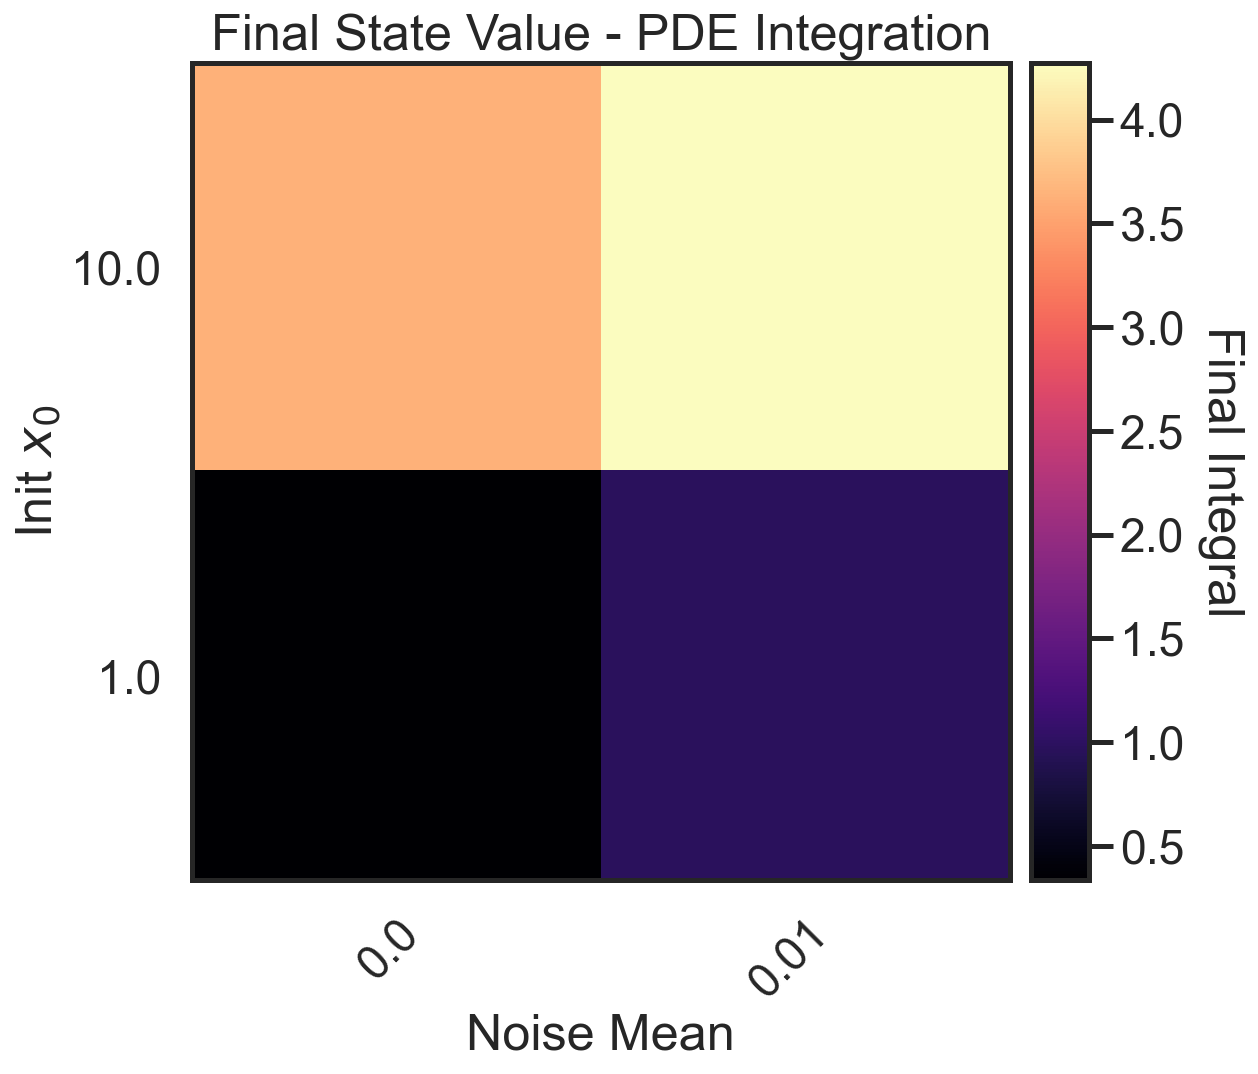

In [12]:
from mle_toolbox.visualize import visualize_2D_grid
fixed_params = {}
params_to_plot = ["noise_mean", "x_0"]
target_to_plot = "integral"
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Final State Value - PDE Integration',
                  xy_labels=[r'Noise Mean', r'Init $x_0$'],
                  variable_name='Final Integral',
                  every_nth_tick=1, round_ticks=3,
                  text_in_cell=False, max_heat=None)

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Final State Value - PDE Integration'}, xlabel='Noise Mean', ylabel='Final Integral'>)

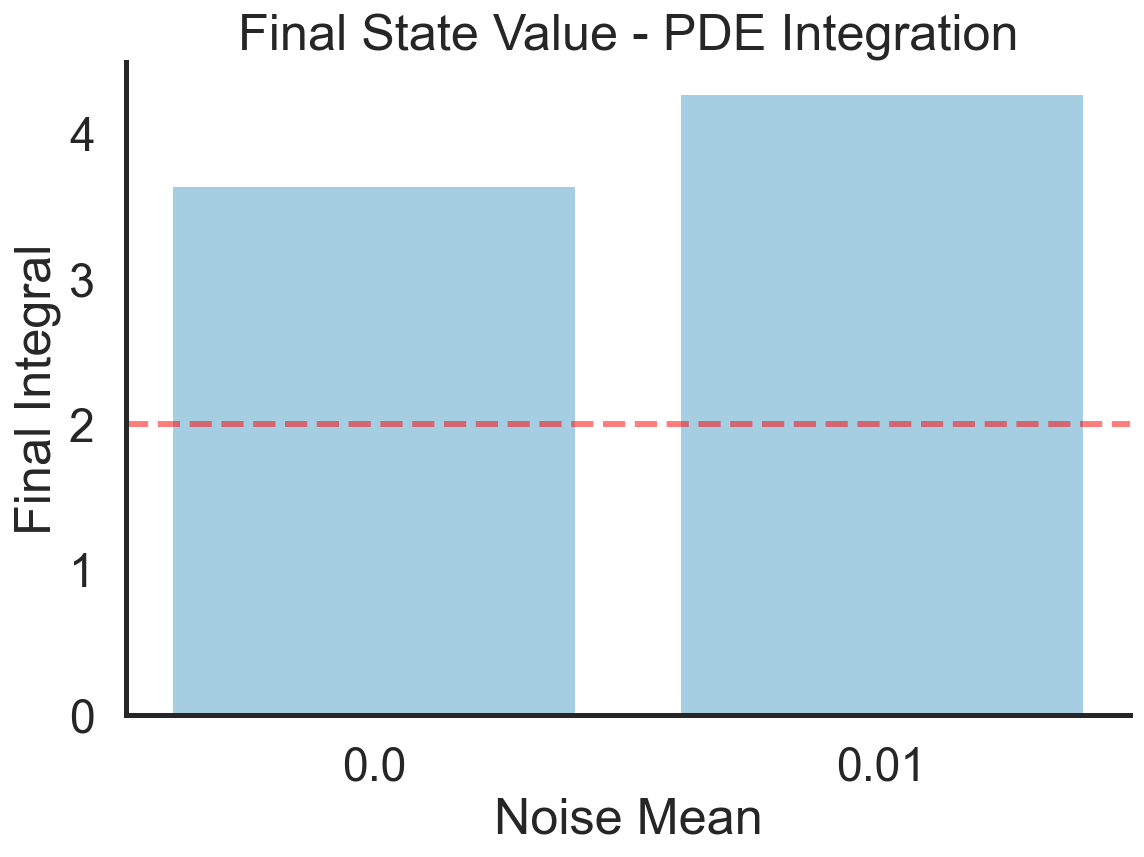

In [22]:
from mle_toolbox.visualize import visualize_1D_bar

param_to_plot = "noise_mean"
target_to_plot = "integral"
fixed_params = {"x_0": 10}
visualize_1D_bar(
    hyper_log,
    fixed_params,
    param_to_plot,
    target_to_plot,
    plot_title=r'Final State Value - PDE Integration',
    xy_labels=[r'Noise Mean', r'Final Integral'],
    every_nth_tick=1,
    round_ticks=3,
    hline=2
)

(<Figure size 576x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Final State Value - PDE Integration'}, xlabel='Noise Mean', ylabel='Final Integral'>)

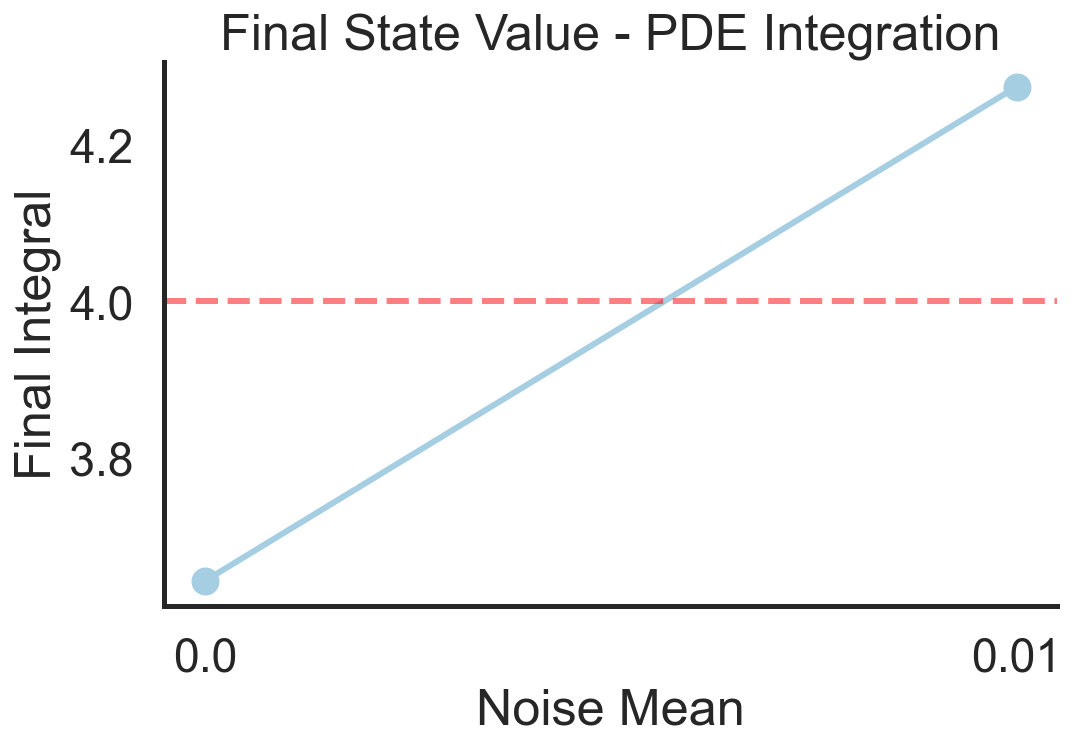

In [31]:
from mle_toolbox.visualize import visualize_1D_line

param_to_plot = "noise_mean"
target_to_plot = "integral"
fixed_params = {"x_0": 10}
visualize_1D_line(
    hyper_log,
    fixed_params,
    param_to_plot,
    target_to_plot,
    plot_title=r'Final State Value - PDE Integration',
    xy_labels=[r'Noise Mean', r'Final Integral'],
    every_nth_tick=1,
    round_ticks=3,
    hline=4
)

# VAE Training Example
### Reload trained network for stored checkpoint

In [ ]:
# Load log and get overview of different logged runs
meta_log, hyper_log = load_result_logs("../examples/experiments/vae/")
print(meta_log.b_1_eval_0.meta.top_k_performance)
print(meta_log.b_1_eval_0.meta.top_k_ckpt_list)

In [ ]:
from mle_toolbox.utils import load_model_ckpt

jax_params = load_model_ckpt(
                ckpt_path="../examples/" + meta_log.b_1_eval_0.meta.top_k_ckpt_list[0][0],
                model_type="jax", model=None)

# For torch model you will have to also supply the model class!

### Subselect the Meta Log and the Hyper Log

In [ ]:
from mle_toolbox.utils import subselect_hyper_log, subselect_meta_log

In [ ]:
# Get experiment run with param closest to selected
sub_hyper = subselect_hyper_log(hyper_log,
                                param_name="l_rates",
                                param_value=0.001)
sub_hyper

In [ ]:
# Get the detailed experiment logs for previously selected runs
sub_log = subselect_meta_log(meta_log, run_ids=sub_hyper.run_id.tolist())
sub_log.keys()